In [1]:
import pandas as pd

# Load your TS-iPASS dataset (replace 'file_path' with the actual path)
df_ipass = pd.read_csv('fact_TS_iPASS.csv')

# Convert 'month' column to datetime
df_ipass['month'] = pd.to_datetime(df_ipass['month'])

# Filter data for FY 2021 and 2022
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2022-03-31')
filtered_df = df_ipass[(df_ipass['month'] >= start_date) & (df_ipass['month'] <= end_date)]

# Group by 'sector' and 'dist_code', and calculate total investment
investment_by_sector = filtered_df.groupby(['sector', 'dist_code'])['investment in cr'].sum().reset_index()

# Group by 'sector' to calculate total investment across districts
total_investment_by_sector = investment_by_sector.groupby('sector')['investment in cr'].sum().reset_index()

# Sort sectors by total investment in descending order
sorted_sectors = total_investment_by_sector.sort_values(by='investment in cr', ascending=False)

# Display the sectors with substantial investment
print(sorted_sectors.head())  # This will show the top sectors


                                           sector  investment in cr
14  Real Estate,Industrial Parks and IT Buildings         3990.2522
12                             Plastic and Rubber         3699.1197
11                  Pharmaceuticals and Chemicals         2649.1294
15               Solar and Other Renewable Energy         2201.5980
2                                       Beverages         1848.1920


In [1]:
import pandas as pd

# Load your TS-iPASS dataset (replace 'file_path' with the actual path)
df_ipass = pd.read_csv('fact_TS_iPASS.csv')

# Convert 'month' column to datetime
df_ipass['month'] = pd.to_datetime(df_ipass['month'])

# Filter data for FY 2021 and 2022
start_date = pd.to_datetime('2021-04-01')
end_date = pd.to_datetime('2023-03-31')
filtered_df = df_ipass[(df_ipass['month'] >= start_date) & (df_ipass['month'] <= end_date)]

# Group by 'sector', 'dist_code', and 'month', and calculate total investment
investment_by_sector = filtered_df.groupby(['sector', 'dist_code', 'month'])['investment in cr'].sum().reset_index()

# Group by 'sector' and 'dist_code' to calculate total investment across districts
total_investment_by_sector = investment_by_sector.groupby(['sector', 'dist_code'])['investment in cr'].sum().reset_index()

# Sort sectors by total investment in descending order
sorted_sectors = total_investment_by_sector.sort_values(by='investment in cr', ascending=False)

# Display the sectors, district codes, and their total investments
print(sorted_sectors.head())  # This will show the top sectors with district codes


                                            sector dist_code  investment in cr
290  Real Estate,Industrial Parks and IT Buildings      15_1         3979.8000
263                             Plastic and Rubber      15_1         3866.4199
266                             Plastic and Rubber      17_2         1765.9516
31                                       Beverages      14_5         1467.0000
28                                      Automobile      17_2         1289.9090


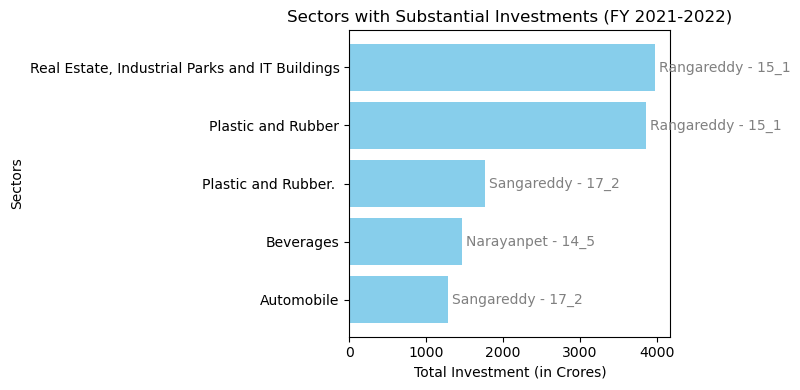

In [3]:
import matplotlib.pyplot as plt

# Data
sectors = [
    'Real Estate, Industrial Parks and IT Buildings',
    'Plastic and Rubber',
    'Plastic and Rubber. ',
    'Beverages',
    'Automobile'
]

districts = [
    'Rangareddy - 15_1',
    'Rangareddy - 15_1',
    'Sangareddy - 17_2',
    'Narayanpet - 14_5',
    'Sangareddy - 17_2'
]

investments = [3979.80, 3866.42, 1765.95, 1467.00, 1289.90]

# Create bar plot
plt.figure(figsize=(8, 4))
plt.barh(sectors, investments, color='skyblue')
plt.xlabel('Total Investment (in Crores)')
plt.ylabel('Sectors')
plt.title('Sectors with Substantial Investments (FY 2021-2022)')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Annotate the bars with district names
for i in range(len(sectors)):
    plt.text(investments[i] + 50, i, districts[i], va='center', fontsize=10, color='gray')

plt.tight_layout()
plt.show()


## Question-12

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
df = pd.read_csv("fact_TS_iPASS.csv")

In [33]:
df['month'] = pd.to_datetime(df['month'], format='%d-%m-%Y')

In [34]:
def get_season(month):
    if month.month in [3, 4, 5]:
        return 'Spring'
    elif month.month in [6, 7, 8]:
        return 'Summer'
    elif month.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [35]:
# Apply the function to create the "season" column
df['season'] = df['month'].apply(get_season)

In [36]:
df.head()

,dist_code,month,sector,investment in cr,number_of_employees,season
0,14_1,2019-04-01,Engineering,2.3200,15,Spring
1,19_1,2019-04-01,Engineering,0.6250,13,Spring
2,20_3,2019-04-01,Wood and Leather,0.2000,8,Spring
3,20_3,2019-04-01,Textiles,0.2675,27,Spring
4,21_5,2019-04-01,Electrical and Electronic Products,0.1200,5,Spring


In [37]:
# Get unique sectors in the dataset
unique_sectors = df['sector'].unique()

In [38]:
# Exclude the 'number_of_employees' column
df = df.drop(columns=['number_of_employees'])

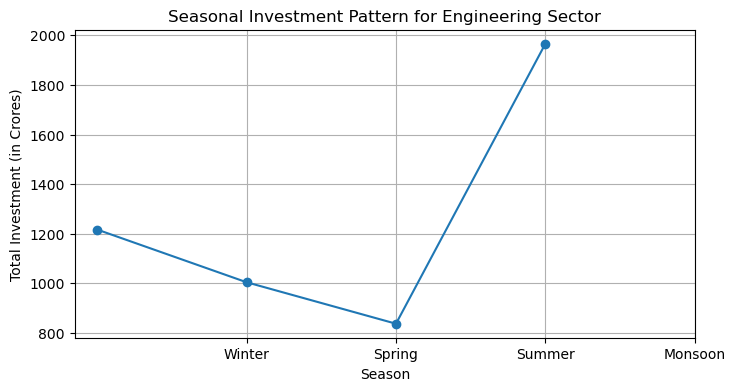

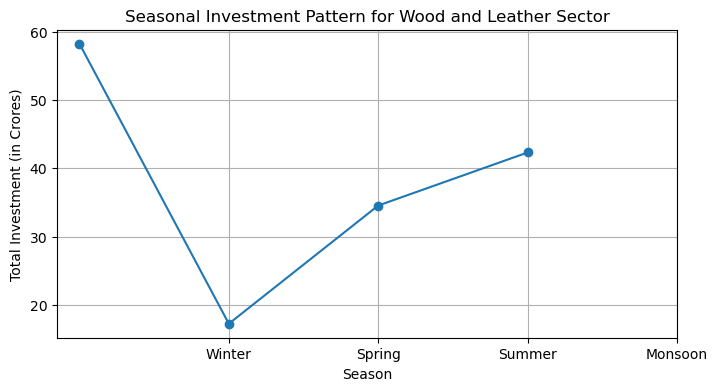

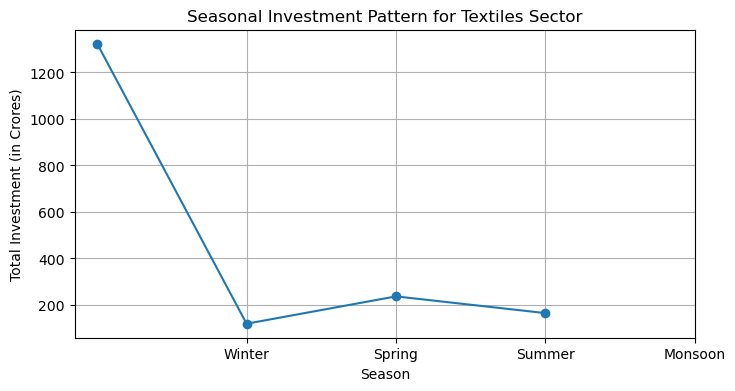

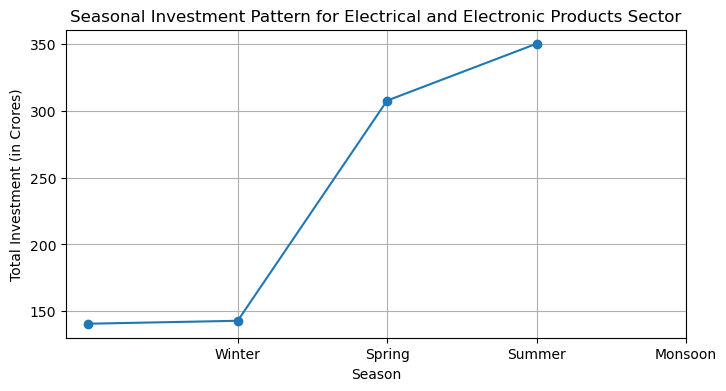

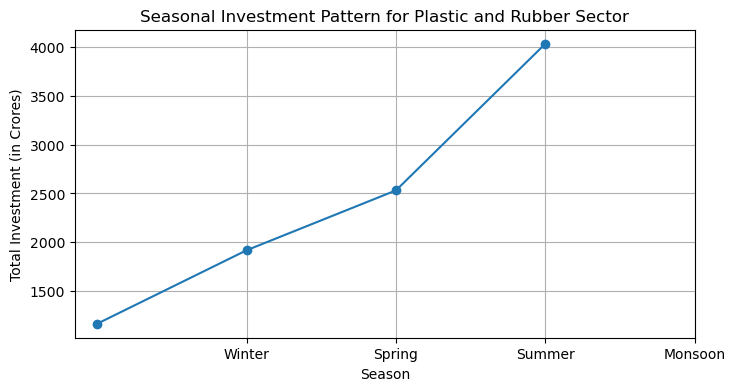

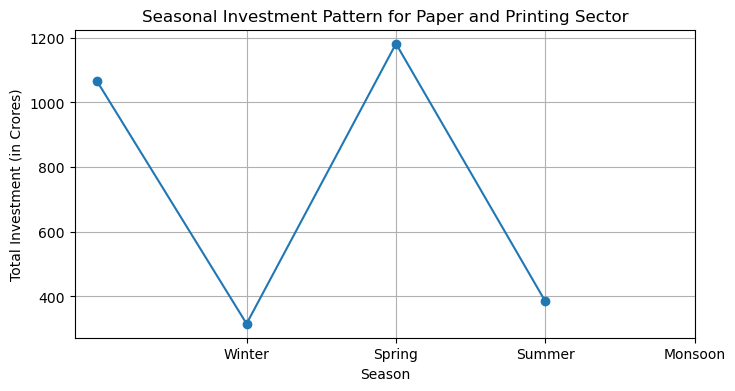

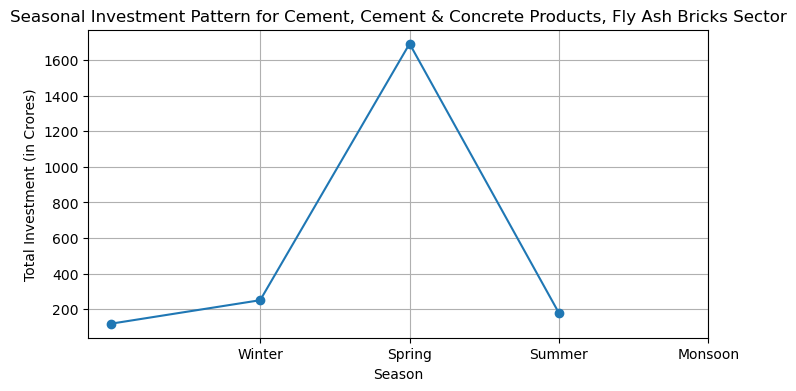

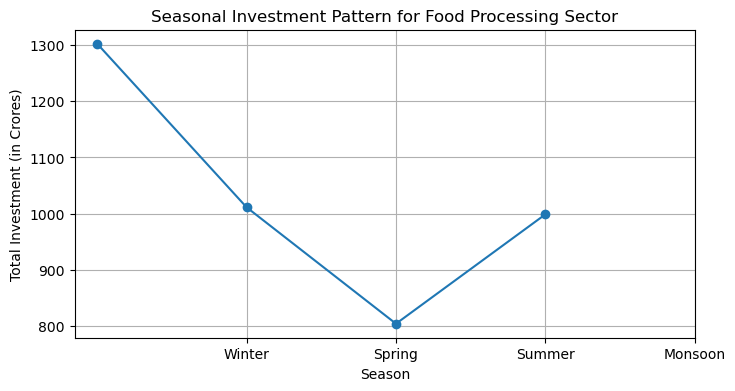

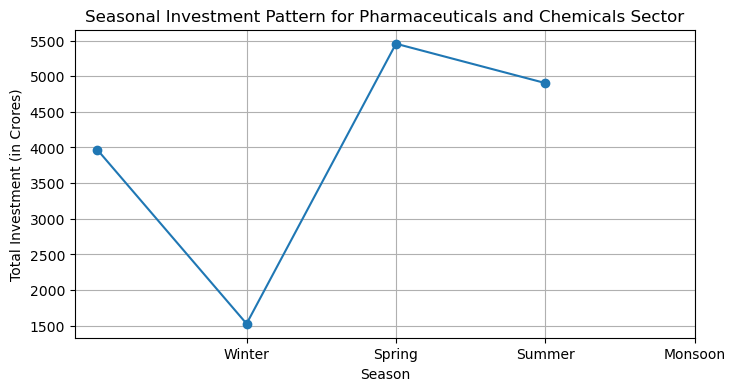

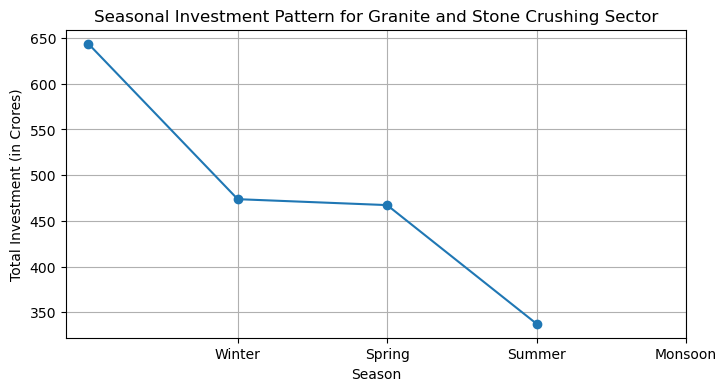

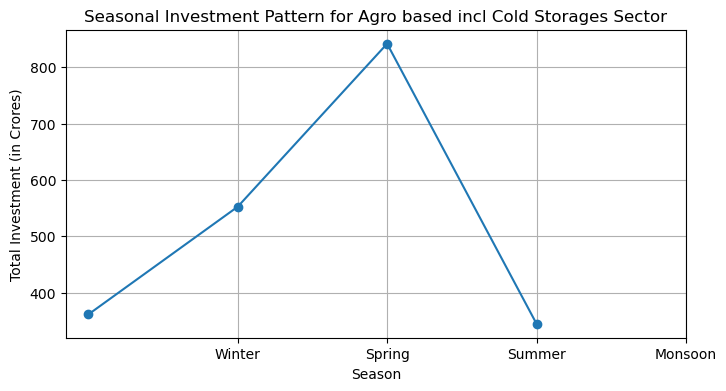

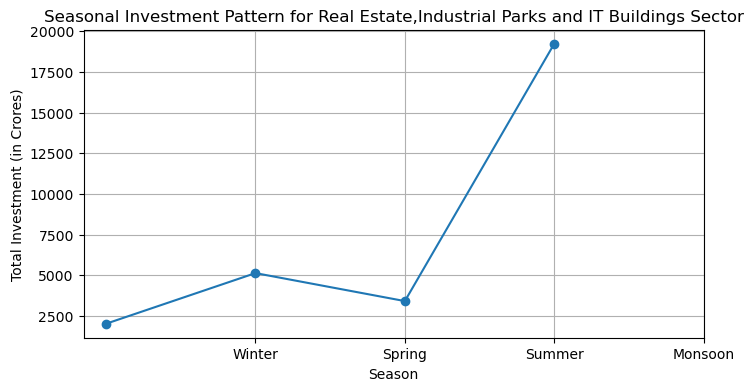

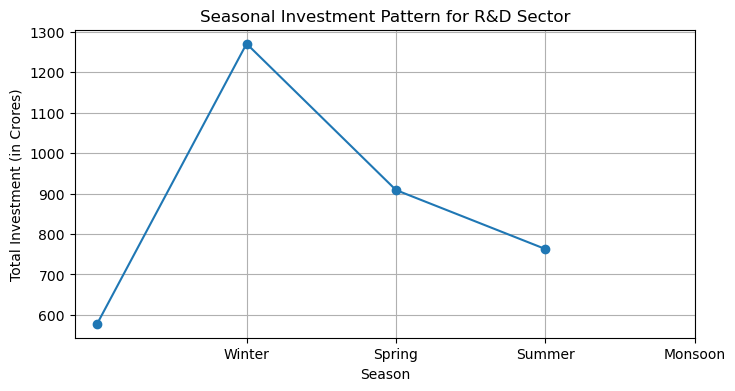

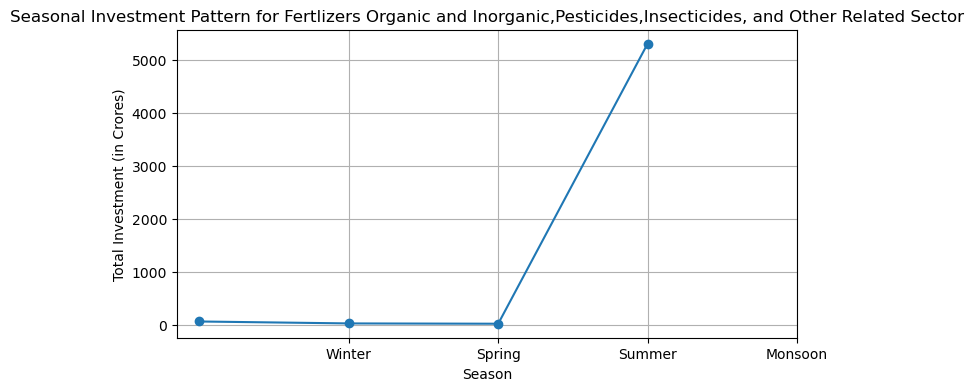

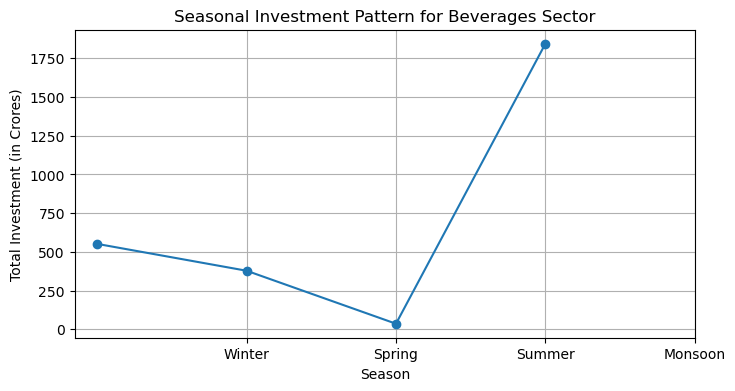

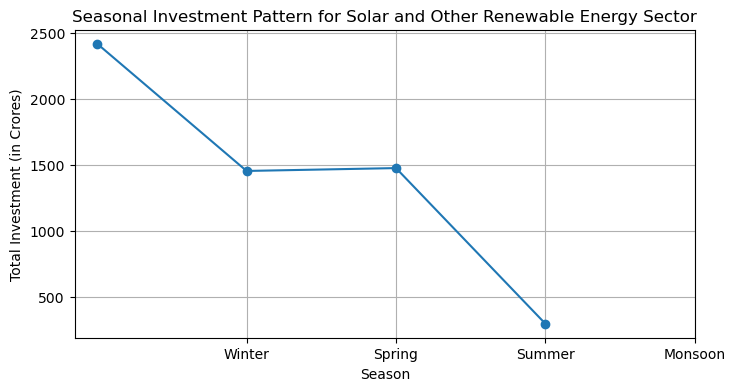

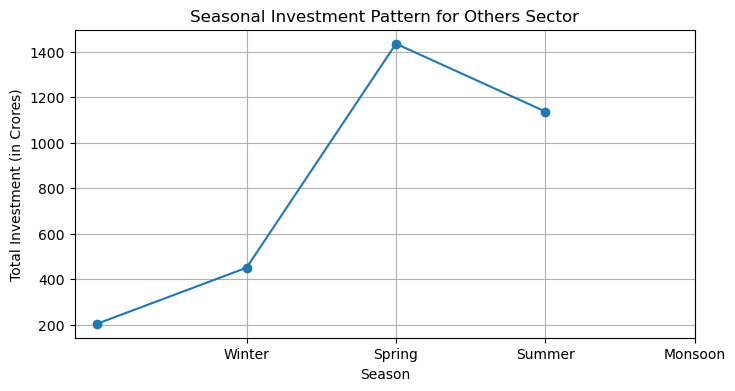

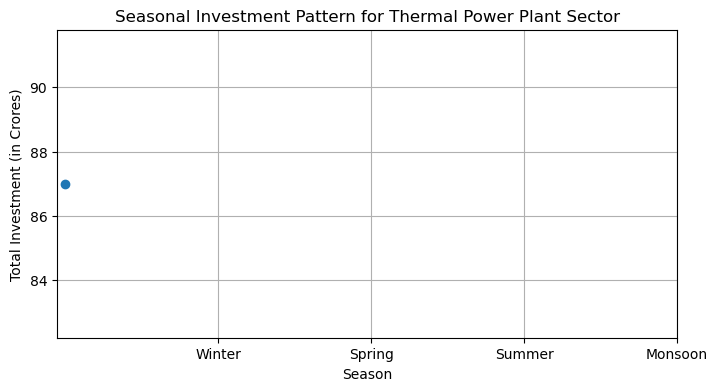

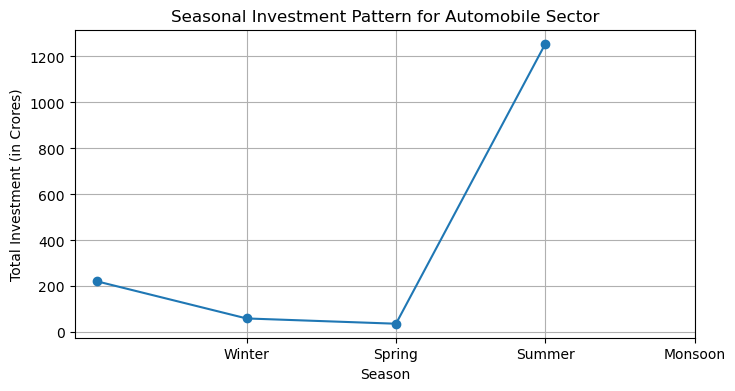

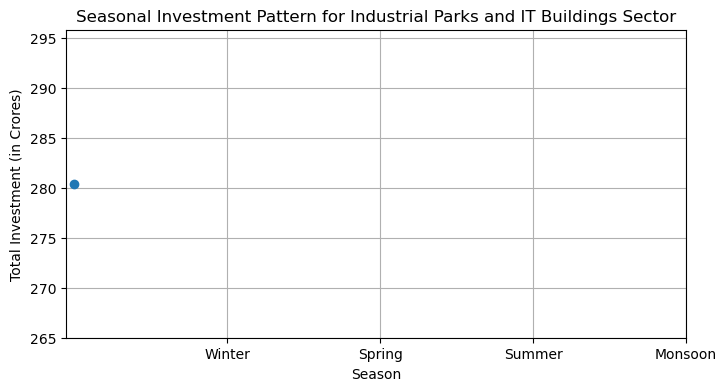

In [40]:
# Create subplots for each sector
for sector_of_interest in unique_sectors:
    sector_df = df[df['sector'] == sector_of_interest]
    
    plt.figure(figsize=(8, 4))
    
    # Group the data by 'season' and calculate the sum of investments
    grouped_data = sector_df.groupby(['season'])['investment in cr'].sum().reset_index()
    
    plt.plot(grouped_data['season'], grouped_data['investment in cr'], marker='o', linestyle='-')
    plt.xlabel('Season')
    plt.ylabel('Total Investment (in Crores)')
    plt.title(f'Seasonal Investment Pattern for {sector_of_interest} Sector')
    plt.xticks(range(1, 5), ['Winter', 'Spring', 'Summer', 'Monsoon'])
    plt.grid(True)
    plt.show()

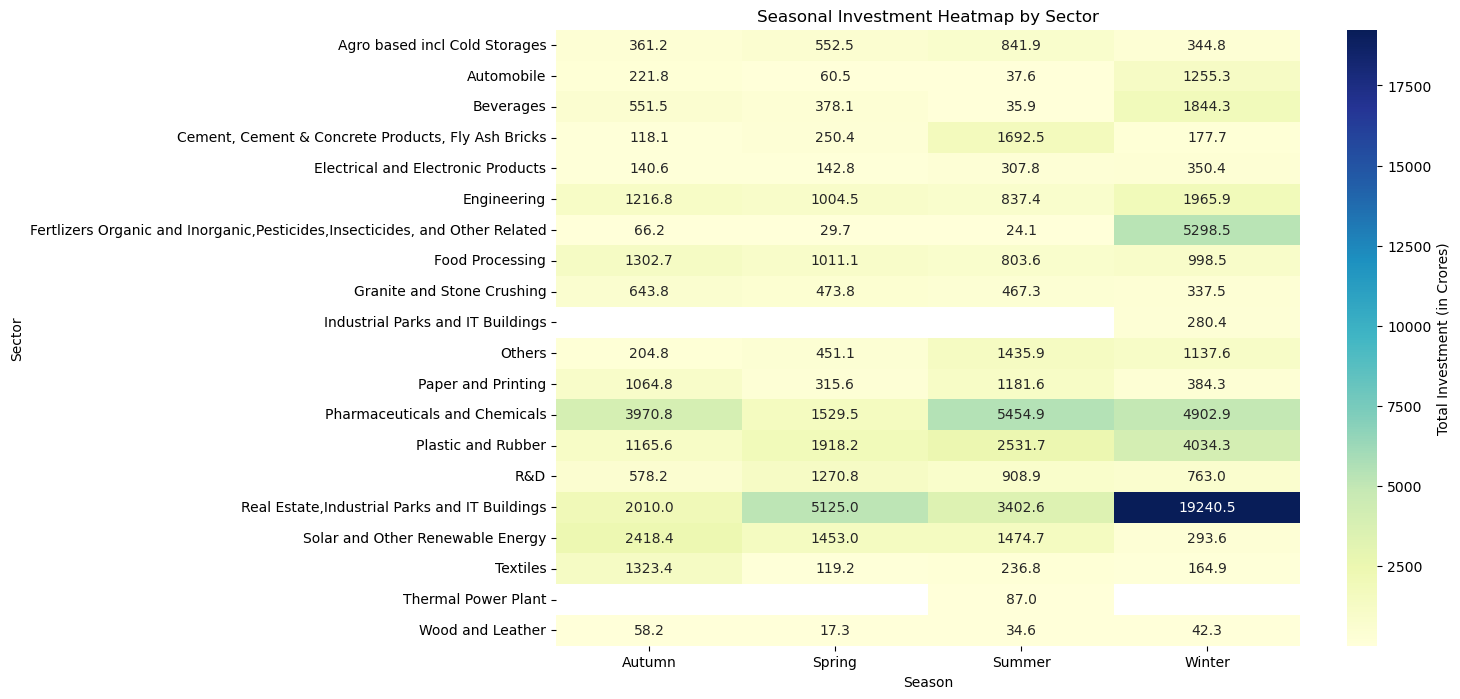

In [41]:
import seaborn as sns

# Pivot the data to create a heatmap
heatmap_data = df.pivot_table(index='sector', columns='season', values='investment in cr', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Total Investment (in Crores)'})
plt.title('Seasonal Investment Heatmap by Sector')
plt.xlabel('Season')
plt.ylabel('Sector')
plt.show()


In [46]:
pivot_table = df.pivot_table(index='season', columns='sector', values='investment in cr', aggfunc='sum')

In [47]:
# Get the sectors with the highest investment for each season
highest_investment_sectors = pivot_table.idxmax(axis=1)

In [48]:
print("Sectors with Highest Investment in Each Season:")
print(highest_investment_sectors)

Sectors with Highest Investment in Each Season:
season
Autumn                    Pharmaceuticals and Chemicals
Spring    Real Estate,Industrial Parks and IT Buildings
Summer                    Pharmaceuticals and Chemicals
Winter    Real Estate,Industrial Parks and IT Buildings
dtype: object


In [49]:
# Extract the month names and create a new column 'month_name'
df['month_name'] = df['month'].dt.strftime('%B')

In [52]:
# Group the data by 'month_name' and 'sector', summing the investments
monthly_sector_investment = df.groupby(['month_name', 'sector'])['investment in cr'].sum().reset_index()

# Find the maximum investment for each 'month_name'
max_investment_by_month = monthly_sector_investment.groupby('month_name')['investment in cr'].transform(max)

# Select the sectors with the maximum investment for each 'month_name'
highest_investment_sectors = monthly_sector_investment[monthly_sector_investment['investment in cr'] == max_investment_by_month]

# Print the result
print(highest_investment_sectors)

    month_name                                             sector  \
15       April                   Solar and Other Renewable Energy   
31      August      Real Estate,Industrial Parks and IT Buildings   
42    December  Fertlizers Organic and Inorganic,Pesticides,In...   
68    February      Real Estate,Industrial Parks and IT Buildings   
84     January                                 Plastic and Rubber   
101       July                      Pharmaceuticals and Chemicals   
119       June                      Pharmaceuticals and Chemicals   
140      March      Real Estate,Industrial Parks and IT Buildings   
158        May      Real Estate,Industrial Parks and IT Buildings   
177   November                   Solar and Other Renewable Energy   
191    October                      Pharmaceuticals and Chemicals   
208  September                      Pharmaceuticals and Chemicals   

     investment in cr  
15          1202.9360  
31          2007.6700  
42          5274.3477  
68    

In [42]:
from scipy.stats import f_oneway

# Assuming df is your DataFrame with investment data
for sector in df['sector'].unique():
    sector_data = df[df['sector'] == sector]
    months = sector_data['month'].unique()
    data = [sector_data[sector_data['month'] == month]['investment in cr'] for month in months]
    
    # Check if there are at least two data arrays to compare
    if len(data) > 1:
        f_statistic, p_value = f_oneway(*data)
        if p_value < 0.05:
            print(f"Significant difference in {sector} investments across months (p-value: {p_value})")
    else:
        print(f"Not enough data points for {sector} to perform ANOVA.")


Significant difference in Wood and Leather investments across months (p-value: 0.04634119076207977)
Significant difference in Electrical and Electronic Products investments across months (p-value: 0.02766418383877625)
Significant difference in Cement, Cement & Concrete Products, Fly Ash Bricks investments across months (p-value: 0.023444187053465928)
Significant difference in Agro based incl Cold Storages investments across months (p-value: 1.4536346741192334e-05)
Not enough data points for Thermal Power Plant to perform ANOVA.
Significant difference in Automobile investments across months (p-value: 0.008533894202003976)
Not enough data points for Industrial Parks and IT Buildings to perform ANOVA.


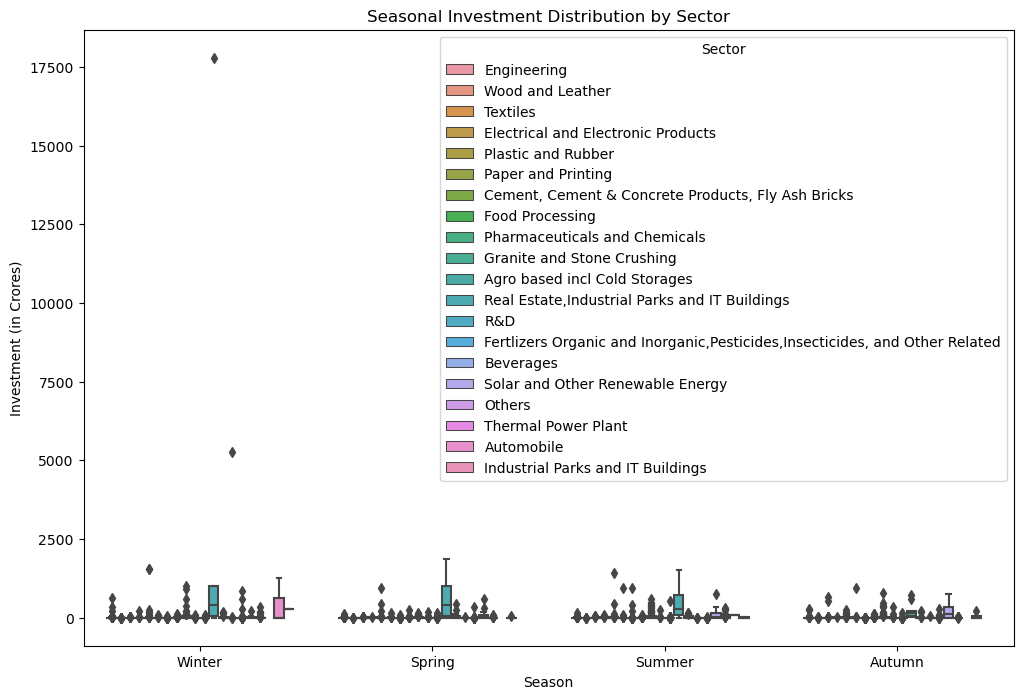

In [44]:
# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='season', y='investment in cr', hue='sector', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Seasonal Investment Distribution by Sector')
plt.xlabel('Season')
plt.ylabel('Investment (in Crores)')
plt.legend(title='Sector')
plt.show()

In [45]:
season_counts = df['season'].value_counts()
print(season_counts)

Autumn    1492
Winter    1459
Summer    1438
Spring    1364
Name: season, dtype: int64
